In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

import sys

sys.path.append("../stochman/")

from stochman import nnj

# Define convolution parameters

In [2]:
'''
def compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1
    return int(output_edge)
def compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)
def compute_reversed_padding(padding, kernel_size=1):
    return kernel_size - 1 - padding
##############################################################################
##############################################################################
##############################################################################
# Set parameters (free to change)

batch_size = 2
IN_c, OUT_c = 2, 2 #number of channels (for input and output)
IN_h, IN_w = 5, 5 #number of pixels per input edges
kernel_size = 3
padding = 1
stride = 1 #don't change me please, bad things will happen
dilation = 1

##############################################################################
# Compute output sizes
OUT_h, OUT_w = compute_output_edge(IN_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation), compute_output_edge(IN_w, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
# Compute output padding for conv transpose
assert compute_output_padding(IN_h, OUT_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation) == compute_output_padding(IN_w, OUT_w, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
output_padding = compute_output_padding(IN_h, OUT_h, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation)
dw_padding = compute_reversed_padding(padding, kernel_size=kernel_size)
dw_reversed_padding = compute_reversed_padding(padding, kernel_size=IN_w)

##############################################################################
# Define convolutional layer
conv = nnj.Conv2d(IN_c, OUT_c, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, bias=None)
assert list(conv.weight.shape) == [OUT_c, IN_c, kernel_size, kernel_size]
# Define input images. Compute output images
inputs = torch.randint(0, 10, (batch_size, IN_c, IN_h, IN_w)).type(torch.float)
outputs = conv(inputs)
assert list(outputs.shape) == [batch_size, OUT_c, OUT_h, OUT_w]
print('conv: \t\t\t weights',conv.weight.shape, '\t- input',inputs.shape, '\t- output',outputs.shape)

# Define reversed convolutional layer (same operator as conv but with switched input/weights)
conv_dw = nnj.ConvTranspose2d(IN_c, batch_size, kernel_size=(IN_h,IN_w),padding=dw_padding,stride=stride,dilation=dilation, output_padding=0, bias=None) #kernel_size value initialization doesn't matter
reversed_inputs = torch.flip(inputs, [-2,-1]).movedim(0,1)
assert conv_dw.weight.shape == reversed_inputs.shape
conv_dw.weight = torch.nn.Parameter(reversed_inputs)
dw_outputs = torch.flip(conv_dw(conv.weight), [-2,-1]).movedim(0,1)
assert torch.max(dw_outputs - outputs) < 1e-5 #chek that the two operators are actually the same
print('conv_dw: \t\t weights',conv_dw.weight.shape, '\t- input',conv.weight.shape, '\t- output',dw_outputs.shape)



# Define transposed of convolutional layer
conv_transposed = nnj.ConvTranspose2d(OUT_c, IN_c, kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, output_padding=output_padding, bias=None)
conv_transposed.weight = conv.weight
assert conv_transposed(outputs).shape == inputs.shape
print('conv_transposed: \t weights',conv_transposed.weight.shape, '\t- input',outputs.shape, '\t- output',conv_transposed(outputs).shape)

# Define transposed reversed convolutional layer 
conv_transposed_dw = nnj.Conv2d(OUT_c, batch_size, kernel_size=(OUT_h,OUT_w),padding=dw_reversed_padding,stride=stride,dilation=dilation, bias=None) #kernel_size value initialization doesn't matter
reversed_outputs = torch.flip(outputs, [-2,-1])
assert conv_transposed_dw.weight.shape == reversed_outputs.shape
conv_transposed_dw.weight = torch.nn.Parameter(reversed_outputs)
print('conv_transposed_dw: \t weights',conv_transposed_dw.weight.shape, '\t- input',conv_transposed.weight.movedim(0,1).shape, '\t- output', conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1).shape)
assert torch.max(conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1) - conv_transposed(outputs)) < 1e-5
'''

"\ndef compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):\n    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1\n    return int(output_edge)\ndef compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):\n    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)\ndef compute_reversed_padding(padding, kernel_size=1):\n    return kernel_size - 1 - padding\n##############################################################################\n##############################################################################\n##############################################################################\n# Set parameters (free to change)\n\nbatch_size = 2\nIN_c, OUT_c = 2, 2 #number of channels (for input and output)\nIN_h, IN_w = 5, 5 #number of pixels per input edges\nkernel_size = 3\npadding = 1\nstride = 1 #don't change me pl

In [126]:
def compute_output_edge(input_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    output_edge = ( input_edge - dilation*(kernel_size-1) + 2*padding -1 )/stride +1 #output edge can be not-integer if stride!=1
    return int(output_edge)
def compute_output_padding(input_edge, output_edge, kernel_size=1,padding=0,stride=1,dilation=1):
    return input_edge - ((output_edge-1)*stride - 2*padding + dilation*(kernel_size-1) + 1)
def compute_reversed_padding(padding, kernel_size=1):
    return kernel_size - 1 - padding
##############################################################################
##############################################################################
##############################################################################
# Set parameters (free to change)

batch_size = 5
IN_c, OUT_c = 2, 3 #number of channels (for input and output)
IN_h, IN_w = 11, 20 #number of pixels per input edges
kernel_h, kernel_w = 3, 3
set_padding_for_shape_preserving = True
if set_padding_for_shape_preserving:
    assert kernel_h%2==1 and kernel_w%2==1
    padding_h, padding_w = int((kernel_h-1)/2), int((kernel_w-1)/2)
else:
    padding_h, padding_w = 1, 1
stride = 1 #don't change me please, bad things will happen
dilation = 1

##############################################################################
# Compute output sizes
OUT_h, OUT_w = compute_output_edge(IN_h, kernel_size=kernel_h, padding=padding_h, stride=stride, dilation=dilation), compute_output_edge(IN_w, kernel_size=kernel_w, padding=padding_w, stride=stride, dilation=dilation)
# Compute output padding for conv transpose
out_padding_h, out_padding_w = compute_output_padding(IN_h, OUT_h, kernel_size=kernel_h, padding=padding_h, stride=stride, dilation=dilation), compute_output_padding(IN_w, OUT_w, kernel_size=kernel_w, padding=padding_w, stride=stride, dilation=dilation)
dw_padding_h, dw_padding_w = compute_reversed_padding(padding_h, kernel_size=kernel_h), compute_reversed_padding(padding_w, kernel_size=kernel_w)
dw_reversed_padding_h, dw_reversed_padding_w = compute_reversed_padding(padding_h, kernel_size=IN_h), compute_reversed_padding(padding_w, kernel_size=IN_w)

##############################################################################
# Define convolutional layer
conv = nnj.Conv2d(IN_c, 
                  OUT_c, 
                  kernel_size=(kernel_h, kernel_w), 
                  padding=(padding_h,padding_w), 
                  stride=stride, dilation=dilation, bias=None)
assert list(conv.weight.shape) == [OUT_c, IN_c, kernel_h, kernel_w]
# Define input images. Compute output images
inputs = torch.randint(0, 10, (batch_size, IN_c, IN_h, IN_w)).type(torch.float)
outputs = conv(inputs)
assert list(outputs.shape) == [batch_size, OUT_c, OUT_h, OUT_w]
print('conv: \t\t\t weights',conv.weight.shape, '\t- input',inputs.shape, '\t- output',outputs.shape)

# Define reversed convolutional layer (same operator as conv but with switched input/weights)
conv_dw = nnj.ConvTranspose2d(IN_c, 
                              batch_size, 
                              kernel_size=(IN_h,IN_w), 
                              padding=(dw_padding_h,dw_padding_w), 
                              stride=stride, dilation=dilation, output_padding=0, bias=None)
reversed_inputs = torch.flip(inputs, [-2,-1]).movedim(0,1)
assert conv_dw.weight.shape == reversed_inputs.shape
conv_dw.weight = torch.nn.Parameter(reversed_inputs)
dw_outputs = torch.flip(conv_dw(conv.weight), [-2,-1]).movedim(0,1)
assert torch.max(dw_outputs - outputs) < 1e-5 #chek that the two operators are actually the same
print('conv_dw: \t\t weights',conv_dw.weight.shape, '\t- input',conv.weight.shape, '\t- output',dw_outputs.shape)



# Define transposed of convolutional layer
conv_transposed = nnj.ConvTranspose2d(OUT_c, 
                                      IN_c, 
                                      kernel_size=(kernel_h,kernel_w), 
                                      padding=(padding_h,padding_w), 
                                      stride=stride, dilation=dilation, bias=None, 
                                      output_padding=(out_padding_h,out_padding_w))
conv_transposed.weight = conv.weight
assert conv_transposed(outputs).shape == inputs.shape
print('conv_transposed: \t weights',conv_transposed.weight.shape, '\t- input',outputs.shape, '\t- output',conv_transposed(outputs).shape)

# Define transposed reversed convolutional layer
if out_padding_h!=0 or out_padding_w!=0:
    ### WARNING: output_padding not supported by conv2d. If it is different from 0 then it won't work! 
    ### Only working case: Must set padding=half (that is shape preserving convolution)
    ###                             that is padding = (kernel-1)/2
    print(out_padding_h, out_padding_w)
conv_transposed_dw = nnj.Conv2d(OUT_c, 
                                batch_size, 
                                kernel_size=(OUT_h,OUT_w),
                                padding=(dw_reversed_padding_h,dw_reversed_padding_w),
                                stride=stride, dilation=dilation, bias=None)
reversed_outputs = torch.flip(outputs, [-2,-1])
assert conv_transposed_dw.weight.shape == reversed_outputs.shape
conv_transposed_dw.weight = torch.nn.Parameter(reversed_outputs)
print('conv_transposed_dw: \t weights',conv_transposed_dw.weight.shape, '\t- input',conv_transposed.weight.movedim(0,1).shape, '\t- output', conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1).shape)
assert torch.max(conv_transposed_dw(conv_transposed.weight.movedim(0,1)).movedim(0,1) - conv_transposed(outputs)) < 1e-5 #chek that the two operators are actually the same

conv: 			 weights torch.Size([3, 2, 3, 3]) 	- input torch.Size([5, 2, 11, 20]) 	- output torch.Size([5, 3, 11, 20])
conv_dw: 		 weights torch.Size([2, 5, 11, 20]) 	- input torch.Size([3, 2, 3, 3]) 	- output torch.Size([5, 3, 11, 20])
conv_transposed: 	 weights torch.Size([3, 2, 3, 3]) 	- input torch.Size([5, 3, 11, 20]) 	- output torch.Size([5, 2, 11, 20])
conv_transposed_dw: 	 weights torch.Size([5, 3, 11, 20]) 	- input torch.Size([2, 3, 3, 3]) 	- output torch.Size([5, 2, 11, 20])


# Jacobian of conv (wrt. input)

In [127]:
IN_size, OUT_size = IN_c*IN_h*IN_w, OUT_c*OUT_h*OUT_w

# define base elements
output_identity = torch.eye(IN_size).unsqueeze(0).expand(batch_size,-1,-1)
output_identity = output_identity.reshape(batch_size, IN_c, IN_h, IN_w, IN_size)

inp = torch.zeros(batch_size,IN_c,IN_h,IN_w)
output = torch.zeros(batch_size,OUT_c,OUT_h,OUT_w)

jacobian = conv._jacobian_mult(inp, output, output_identity)

# Jacobian of conv (wrt. weights)

In [137]:
# define base elements
output_identity = torch.eye(OUT_c*IN_c*kernel_h*kernel_w)#.unsqueeze(0).expand(OUT_c*OUT_c,-1,-1)
output_identity = output_identity.reshape(OUT_c,
                                          IN_c,kernel_h,kernel_w, 
                                          OUT_c*IN_c*kernel_h*kernel_w)

inp = torch.zeros(OUT_c,IN_c,kernel_h,kernel_w)
assert inp.shape == conv.weight.shape
output = torch.zeros(OUT_c,batch_size,OUT_h,OUT_w)
print(inp.shape, output.shape, output_identity.shape)
print('conv_dw: weights',conv_dw.weight.shape, '- input',conv.weight.shape, '- output',dw_outputs.shape)

jacobian_dw = conv_dw._jacobian_mult(inp, output, output_identity)
jacobian_dw = torch.flip(jacobian_dw, [-3, -2]).movedim(0,1)
print(jacobian_dw.shape)
jacobian_dw = jacobian_dw.reshape(batch_size, OUT_c*OUT_h*OUT_w, OUT_c*IN_c*kernel_h*kernel_w)
print(jacobian_dw.shape)
print(f"correct shape = {batch_size, OUT_c * OUT_h * OUT_w, OUT_c*IN_c * kernel_h * kernel_w}")


torch.Size([3, 2, 3, 3]) torch.Size([3, 5, 11, 20]) torch.Size([3, 2, 3, 3, 54])
conv_dw: weights torch.Size([2, 5, 11, 20]) - input torch.Size([3, 2, 3, 3]) - output torch.Size([5, 3, 11, 20])
torch.Size([5, 3, 11, 20, 54])
torch.Size([5, 660, 54])
correct shape = (5, 660, 54)


# Assess jacobian wrt weights comparing to row-by-row computation (single layer NN, for now)

torch.Size([5, 54])
torch.Size([5, 660, 54]) torch.Size([5, 660, 54])
Pointwise max difference beetwen two methods = tensor(0., grad_fn=<MaxBackward1>)


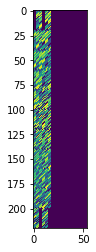

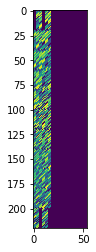

In [129]:
from asdfghjkl.gradient import batch_gradient

def _flatten_after_batch(tensor: torch.Tensor):
    if tensor.ndim == 1:
        return tensor.unsqueeze(-1)
    else:
        return tensor.flatten(start_dim=1)
        
def _get_batch_grad(model):
    batch_grads = list()
    for module in model.modules():
        if hasattr(module, 'op_results'):
            res = module.op_results['batch_grads']
            if 'weight' in res:
                batch_grads.append(_flatten_after_batch(res['weight']))
            if 'bias' in res:
                batch_grads.append(_flatten_after_batch(res['bias']))
            if len(set(res.keys()) - {'weight', 'bias'}) > 0:
                raise ValueError(f'Invalid parameter keys {res.keys()}')
    return torch.cat(batch_grads, dim=1)

'''def batch_gradient(model, loss_fn, inputs, targets):
    with extend(model, OP_BATCH_GRADS):
        model.zero_grad()
        f = model(inputs)
        loss = loss_fn(f, targets)
        loss.backward()
    return f'''
    
def jacobians(x, model, output_channel, output_h, output_w):
    """Compute Jacobians \\(\\nabla_\\theta f(x;\\theta)\\) at current parameter \\(\\theta\\)
    using asdfghjkl's gradient per output dimension.
    Parameters
    ----------
    x : torch.Tensor
        input data `(batch, input_shape)` on compatible device with model.
    Returns
    -------
    Js : torch.Tensor
        Jacobians `(batch, parameters, outputs)`
    f : torch.Tensor
        output function `(batch, outputs)`
    """
    Js = list()
    for c in range(output_channel):
        for i in range(output_h):
            for j in range(output_w):
                def loss_fn(outputs, targets):
                    return outputs[:, c, i, j].sum()

                f = batch_gradient(model, loss_fn, x, None).detach()
                Jk = _get_batch_grad(model)

                Js.append(Jk)
    Js = torch.stack(Js, dim=1)
    print(Jk.shape)
    return Js, f

#conv = nnj.Conv2d(1,1,kernel_size=kernel_size,padding=padding,stride=stride,dilation=dilation, bias=None)
Js, _ = jacobians(inputs, conv, OUT_c, OUT_h, OUT_w)


print(Js.shape, jacobian_dw.shape)
print('Pointwise max difference beetwen two methods =',torch.max(jacobian_dw - Js))

plt.imshow(Js[0, :220, :].detach().numpy())
plt.show()

plt.imshow(jacobian_dw[0, :220, :].detach().numpy())
plt.show()

# J^T * tmp * J  --> FULL matrix (tmp) case

In [144]:
# wrt input 
tmp = torch.randint(0, 10, (batch_size, OUT_size, OUT_size)).type(torch.float)

    #actual implementation.movedim(1,2
tmp_rows = tmp.reshape(batch_size, OUT_c, OUT_h, OUT_w, OUT_size)
tmpt_cols = tmp_rows
Jt_tmptt_cols = conv_transposed._jacobian_mult(torch.zeros(batch_size, OUT_c, OUT_h, OUT_w), 
                                              torch.zeros(batch_size, IN_c, IN_h, IN_w), 
                                              tmpt_cols)
Jt_tmptt_rows = Jt_tmptt_cols.reshape(batch_size,IN_size,OUT_size).movedim(1,2).reshape(batch_size,OUT_c,OUT_h,OUT_w,IN_size)
tmp_J_cols = Jt_tmptt_rows
Jt_tmp_J_cols = conv_transposed._jacobian_mult(torch.zeros(batch_size, OUT_c, OUT_h, OUT_w), 
                                              torch.zeros(batch_size, IN_c, IN_h, IN_w), 
                                              tmp_J_cols)
Jt_tmp_J = Jt_tmp_J_cols.reshape(batch_size,IN_size,IN_size).movedim(1,2)


jacobian = jacobian.reshape(batch_size,OUT_size,IN_size)
slow_shit = torch.einsum('Bji,Bjk,Bkq->Biq',jacobian,tmp,jacobian)

print(slow_shit.shape, Jt_tmp_J.shape)
print(torch.max(slow_shit - Jt_tmp_J))
37



WE_size = kernel_h*kernel_w*IN_c*OUT_c
#wrt weight
tmp_rows = tmp.reshape(batch_size, OUT_c, OUT_h, OUT_w, OUT_size)
tmpt_cols = tmp_rows
print(tmpt_cols.shape)
Jt_tmptt_cols = conv_transposed_dw._jacobian_mult(torch.zeros(IN_c, OUT_c, OUT_h, OUT_w), 
                                                  torch.zeros(IN_c, batch_size, kernel_h, kernel_w), 
                                                  tmpt_cols)
Jt_tmptt_rows = Jt_tmptt_cols.reshape(batch_size,WE_size,OUT_size).movedim(1,2).reshape(batch_size,IN_c,IN_h,IN_w,OUT_size)
tmp_J_cols = Jt_tmptt_rows
Jt_tmp_J_cols = conv_transposed_dw._jacobian_mult(torch.zeros(batch_size, OUT_c, OUT_h, OUT_w), 
                                              torch.zeros(batch_size, IN_c, IN_h, IN_w), 
                                              tmp_J_cols)
Jt_tmp_J = Jt_tmp_J_cols.reshape(batch_size,WE_size,WE_size).movedim(1,2)


jacobian = jacobian.reshape(batch_size,OUT_size,IN_size)
print(jacobian.shape)
slow_shit = torch.einsum('Bji,Bjk,Bkq->Biq',jacobian_dw,tmp,jacobian_dw)

print(slow_shit.shape, Jt_tmp_J.shape)
print(torch.max(slow_shit - Jt_tmp_J))11599500 / 


torch.Size([5, 440, 440]) torch.Size([5, 440, 440])
tensor(1.4305e-06, grad_fn=<MaxBackward1>)
torch.Size([5, 3, 11, 20, 660])


RuntimeError: shape '[2, 660, 5, 3, 3]' is invalid for input of size 11599500

In [161]:
tmp_rows.shape, IN_c, OUT_c, OUT_h, OUT_w

(torch.Size([5, 3, 11, 20, 660]), 2, 3, 11, 20)

In [162]:
tmpt_cols.movedim((1, 2, 3), (-3, -2, -1)).reshape(-1, OUT_c, OUT_h, OUT_w).shape

torch.Size([3300, 3, 11, 20])

In [163]:
F.conv2d(
    tmpt_cols.movedim((1, 2, 3), (-3, -2, -1)).reshape(-1, OUT_c, OUT_h, OUT_w),
    weight=conv_transposed_dw.weight,
    bias=None,
    stride=conv_transposed_dw.stride,
    padding=conv_transposed_dw.padding,
    dilation=conv_transposed_dw.dilation,
    groups=conv_transposed_dw.groups,
).shape

torch.Size([3300, 5, 19, 37])

In [147]:
OUT_c, OUT_h, OUT_w, tmpt_cols.movedim((1, 2, 3), (-3, -2, -1)).reshape(-1, OUT_c, OUT_h, OUT_w).shape

(3, 11, 20, torch.Size([3300, 3, 11, 20]))

In [148]:
conv_transposed_dw.weight.shape

torch.Size([5, 3, 11, 20])

In [165]:
conv_transposed_dw.padding37

(9, 18)

In [146]:

F.conv2d(
    tmpt_cols.movedim((1, 2, 3), (-3, -2, -1)).reshape(-1, OUT_c, OUT_h, OUT_w),
    weight=conv_transposed_dw.weight,
    bias=None,
    stride=conv_transposed_dw.stride,
    padding=conv_transposed_dw.padding,
    dilation=conv_transposed_dw.dilation,
    groups=conv_transposed_dw.groups,
).shape

torch.Size([3300, 5, 19, 37])

# J^T * tmp * J  --> DIAGONAL matrix (tmp) case

In [56]:
diag_tmp = torch.randint(1, 10, (batch_size, OUT_size)).type(torch.float)
tmp = torch.diag_embed(diag_tmp, dim1=1)
print('tmp shape =',tmp.shape)
print('jac shape =',jacobian.shape)




# SLOW IMPLEMENTATION (requires jacobian matrixes AND full tmp stored)
slow_Jt_tmp_J = torch.einsum('Bji,Bjk,Bkq->Biq', jacobian, tmp, jacobian)
slow_diag_Jt_tmp_J = torch.zeros_like(slow_Jt_tmp_J)
for b in range(batch_size):
    for i in range(IN_size):
        slow_diag_Jt_tmp_J[b,i,i] = slow_Jt_tmp_J[b,i,i]


#FAST IMPLEMENTATION (never access to tmp, only to diag_tmp)
conv_sq = nnj.ConvTranspose2d(IN_c,
                              OUT_c,
                              kernel_size=(kernel_h,kernel_w),
                              padding=(padding_h,padding_w),
                              stride=stride,dilation=dilation, output_padding=0, bias=None)
conv_sq.weight = torch.nn.Parameter(conv.weight**2)

input_tmp = diag_tmp.reshape(batch_size,OUT_c,OUT_h,OUT_w)
output_tmp = conv_sq._jacobian_mult(torch.zeros(batch_size, OUT_c,OUT_h,OUT_w), 
                                    torch.zeros(batch_size, IN_c, IN_h, IN_w), 
                                    input_tmp)
diag_Jt_tmp_J = output_tmp.reshape(batch_size, IN_size)



print(diag_Jt_tmp_J.shape, slow_diag_Jt_tmp_J.shape)
print(torch.diagonal(slow_diag_Jt_tmp_J, dim1=1, dim2=2).shape)
print('Pointwise max difference beetwen two methods =',torch.max(diag_Jt_tmp_J-torch.diagonal(slow_diag_Jt_tmp_J, dim1=1, dim2=2)))

tmp shape = torch.Size([2, 440, 440])
jac shape = torch.Size([2, 440, 440])
torch.Size([2, 440]) torch.Size([2, 440, 440])
torch.Size([2, 440])
Pointwise max difference beetwen two methods = tensor(4.7684e-07, grad_fn=<MaxBackward1>)
